In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


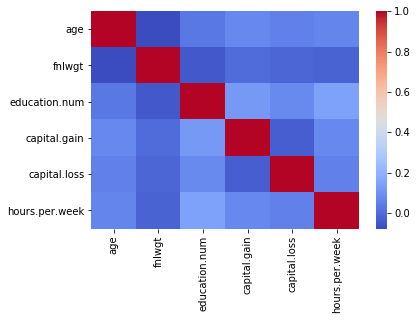

In [8]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [ ]:
'''

age               
workclass        ->  drop

                    array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
                       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
                          dtype=object)
      
      
fnlwgt            
education         -> drop
education.num     
marital.status    -> drop / Never-Married or Married
                        array(['Widowed', 'Divorced', 'Separated', 'Never-married',
                   'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
                  dtype=object)
            
occupation        -> drop
relationship      -> drop  
                        array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
                       'Husband', 'Wife'], dtype=object)

race              -> drop    
              array(['White', 'Black', 'Asian-Pac-Islander', 'Other','Amer-Indian-Eskimo'], dtype=object)    
              
sex               -> get_dummies        
capital.gain      
capital.loss      
hours.per.week    
native.country    -> United-States or Others then get_dummies

                    array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
                  dtype=object)
      
                  -> dropping due to too many values
      
income            -> get_dummies   array(['<=50K', '>50K'], dtype=object)

'''

In [18]:
df.columns


Index([u'age', u'workclass', u'fnlwgt', u'education', u'education.num',
       u'marital.status', u'occupation', u'relationship', u'race', u'sex',
       u'capital.gain', u'capital.loss', u'hours.per.week', u'native.country',
       u'income'],
      dtype='object')

In [23]:
sex = pd.get_dummies(df['sex'], drop_first = True)

In [26]:
df = pd.concat([df,sex], axis=1)

In [27]:
#Male =1, Female = 0
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Male
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0


In [45]:
#get dummies on income
income = pd.get_dummies(df['income'], drop_first = True)
df = pd.concat([df,income], axis=1)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Male,>50K
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0


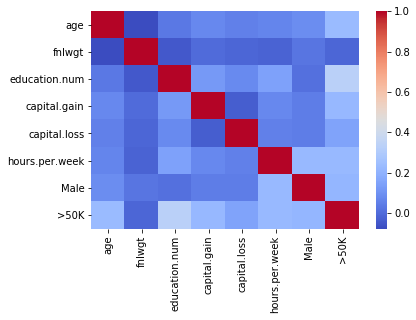

In [46]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [48]:
#Now we drop all the columns having strings
'''
([u'age', u'workclass', u'fnlwgt', u'education', u'education.num',
       u'marital.status', u'occupation', u'relationship', u'race', u'sex',
       u'capital.gain', u'capital.loss', u'hours.per.week', u'native.country',
       u'income'],'''

df.drop([ 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex',  'native.country', 'income' ], axis=1, inplace = True)

In [49]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,Male,>50K
0,90,77053,9,0,4356,40,0,0
1,82,132870,9,0,4356,18,0,0
2,66,186061,10,0,4356,40,0,0
3,54,140359,4,0,3900,40,0,0
4,41,264663,10,0,3900,40,0,0


In [64]:
#We have cleaned our data now, we scale our data accprdingly to get apply KNN algorithm
scaler.fit(df.drop('>50K', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
scaled_features = scaler.transform(df.drop('>50K', axis = 1))

In [67]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [68]:
df_feat.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,Male
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,-1.422331
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,-1.422331
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,-1.422331
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,-1.422331
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,-1.422331


In [69]:
#Let's split train-data and test-data

from sklearn.model_selection import train_test_split


In [70]:
X = df_feat
y = df['>50K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
#Let the value of K be 1
knn = KNeighborsClassifier(n_neighbors=1)


In [74]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [75]:
#predictions

pred = knn.predict(X_test)

In [76]:
#Let's do an evaluation of our KNN Model

from sklearn.metrics import classification_report, confusion_matrix

In [77]:
print confusion_matrix(y_test, pred)

[[4256  673]
 [ 737  847]]


In [78]:
print classification_report(y_test, pred)

             precision    recall  f1-score   support

          0       0.85      0.86      0.86      4929
          1       0.56      0.53      0.55      1584

avg / total       0.78      0.78      0.78      6513



In [81]:
#As the precision and recall can be made better by different value of K, we find a better K

error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))



In [82]:
plt.figure(figsize = (10,6))

Text(0,0.5,u'ErrorRate')

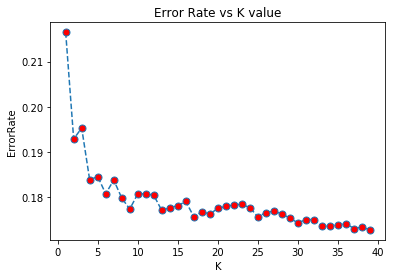

In [90]:
plt.plot(range(1,40), error_rate, linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 7)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('ErrorRate')

In [96]:
#Choose a K Value according to the graph

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [97]:
pred = knn.predict(X_test)

In [98]:
print confusion_matrix(y_test, pred)

[[4623  306]
 [ 838  746]]


In [99]:
print classification_report(y_test, pred)

             precision    recall  f1-score   support

          0       0.85      0.94      0.89      4929
          1       0.71      0.47      0.57      1584

avg / total       0.81      0.82      0.81      6513

